In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf)

In [2]:
#Variable Initialization
lambda1, lambda2, N10, t, dt = S('lambda1, lambda2, N10, t, dt')

#Importing the file
f = open('NPRE 247_CP 1_Input')

for line in f:
    print(line) 

#Initializing the variables
thalf_A = 2.53 #hours
thalf_B = 11.05 #hours
thalf_C = oo #hours

NA_0 = 100 #number of atoms
NB_0 = 0 #number of atoms
NC_0 = 0 #number of atoms

t_final = 60 #hours
dt = 1 #hours

thalf_A = 2.53 #hours

thalf_B = 11.05 #hours

thalf_C = oo #hours



NA_0 = 100 #number of atoms

NB_0 = 0 #number of atoms

NC_0 = 0 #number of atoms



t_final = 60 #hours

dt = 1 #hours


In [3]:
#Decay Constants
dcA = log(2) / thalf_A
dcB = log(2) / thalf_B
dcC = log(2) / thalf_C

In [4]:
#2.1.2, Analytical Function
def analytical_soultion(dc1, dc2, N0, tf):
    N1 = N0 * exp(-dc1 * tf)
    N2 = dc1 / (dc2 - dc1) * N0 * (exp(-dc1 * tf) - exp(-dc2*tf))
    N3 = N0 / (dc2 - dc1) * (dc2*(1-exp(-dc1*tf)) - dc1*(1-exp(-dc2*tf)))
    
    print('Abundance of A after', tf,'hours has passed:', N1)
    print('Abundance of B after', tf,'hours has passed:', N2)
    print('Abundance of C after', tf,'hours has passed:', N3)
    return

In [5]:
#Analytical Soultion
analytical_soultion(dcA, dcB, NA_0, t_final)

Abundance of A after 60 hours has passed: 7.26020225449677e-6
Abundance of B after 60 hours has passed: 3.00863366965769
Abundance of C after 60 hours has passed: 96.9913590701401


In [22]:
#Numerical Function
def numerical_soultion(dc1, dc2, N0, tf, dt):
    
#Sizing the Arrays
    array_size = int(tf / dt)
    if (array_size*dt < tf):
        array_size = array_size + 1
    array_size = array_size + 1
    
#Initializing the Array
    N1 = np.zeros(array_size)
    N2 = np.zeros(array_size)
    N3 = np.zeros(array_size)
    t = np.arange(0, dt*array_size, dt)
    
    N1[0] = N0
    
#Finding the Values
    for i in range(array_size - 1):
        N1[i+1] = -dc1*N1[i]*dt + N1[i]
        N2[i+1] = (dc1*N1[i] - dc2*N2[i])*dt + N2[i]
        N3[i+1] = dc2*N2[i]*dt + N3[i]
    
#Plotting
    plt.plot(t, N1+N2+N3, label=('Total N'))
    plt.plot(t, N1, label=('N of A dt=', dt,'hours'))
    plt.plot(t, N2, label=('N of B dt=', dt,'hours'))
    plt.plot(t, N3, label=('N of C dt=', dt,'hours'))
    
    plt.xlabel('Time Elapsed [hours]')
    plt.ylabel('Abundance')
    plt.legend()
    
#Exporting
    g = open('NPRE 247_CP 1_Output', 'a')
    g.write('Analytical solutions for A:\n')
    g.write(str(N1))
    g.write('\n')
    g.write('Analytical solutions for B:\n')
    g.write(str(N2))
    g.write('\n')
    g.write('Analytical solutions for C:\n')
    g.write(str(N3))
    
#Results
    print('Abundance of NA after', tf, 'hours with time step of', dt,'hours :', N1[-1])
    print('Abundance of NB after', tf, 'hours with time step of', dt,'hours :', N2[-1])
    print('Abundance of NC after', tf, 'hours with time step of', dt,'hours :', N3[-1])
    print('Abundance of NT after', tf, 'hours with time step of', dt,'hours :', N1[-1] + N2[-1] + N3[-1])
    
    return

In [18]:
#Numerical Function, Abundance of B
def numerical_soultion_B(dc1, dc2, N0, tf, dt):
    
#Sizing the Arrays
    array_size = int(tf / dt)
    if (array_size*dt < tf):
        array_size = array_size + 1
    array_size = array_size + 1
    
#Initializing the Array
    N1 = np.zeros(array_size)
    N2 = np.zeros(array_size)
    t = np.arange(0, dt*array_size, dt)
    
    N1[0] = N0
    
#Finding the Values
    for i in range(array_size - 1):
        N1[i+1] = -dc1*N1[i]*dt + N1[i]
        N2[i+1] = (dc1*N1[i] - dc2*N2[i])*dt + N2[i]
    
#Plotting
    plt.plot(t, N2, label=('N of B dt=', dt,'hours'))
    
    plt.xlabel('Time Elapsed [hours]')
    plt.ylabel('Abundance')
    plt.legend()
    
#Printing
    print('Abundance of NB after', tf, 'hours with time step of', dt,'hours :', N2[-1])
    
    return

In [19]:
#Graphing Analytical Soultion
t = S('t')

array_size = int(t_final / dt)
if (array_size*dt < t_final):
    array_size = array_size + 1
array_size = array_size + 1

NB_analytical = (dcA / (dcB - dcA) * NA_0 * (exp(-dcA*t) - exp(-dcB*t))).evalf()
NB_time = np.arange(0, dt*array_size, dt)
NB_abundance = np.zeros(array_size)

for i in range(array_size):
    NB_abundance[i] = NB_analytical.subs(t, i)

Abundance of NB after 60 hours with time step of 2 hours : 2.3246903954844282
Abundance of NB after 60 hours with time step of 1 hours : 2.6598318332152235
Abundance of NB after 60 hours with time step of 0.01 hours : 3.0050829379983575
Abundance of NB using the analytical solution : 3.008633669657686


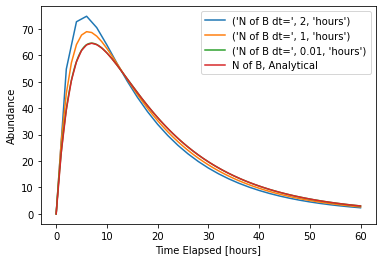

In [23]:
#2.2.1

#Numerical Solutions
numerical_soultion_B(dcA, dcB, NA_0, t_final, 2)
numerical_soultion_B(dcA, dcB, NA_0, t_final, dt)
numerical_soultion_B(dcA, dcB, NA_0, t_final, .01)

#Analytical Solutions
plt.plot(NB_time, NB_abundance, label=('N of B, Analytical'))
print('Abundance of NB using the analytical solution :', NB_abundance[-1])
plt.legend()

Abundance of NA after 60 hours with time step of 0.01 hours : 7.09825092701182e-06
Abundance of NB after 60 hours with time step of 0.01 hours : 3.0050829379983575
Abundance of NC after 60 hours with time step of 0.01 hours : 96.99490996375067
Abundance of NT after 60 hours with time step of 0.01 hours : 99.99999999999996


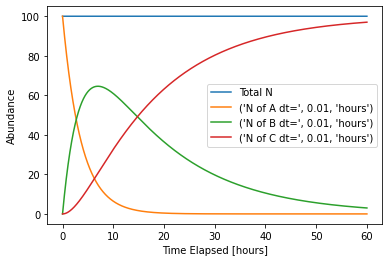

In [24]:
#2.2.2
numerical_soultion(dcA, dcB, NA_0, t_final, .01)

In [500]:
#2.2.3, Finding Max

def max_Abundance_B(dc1, dc2, N0, tf, dt):

#Sizing the Arrays
    array_size = int(tf / dt)
    if (array_size*dt < tf):
        array_size = array_size + 1
    array_size = array_size + 1
    
#Initializing the Array
    N1 = np.zeros(array_size)
    N2 = np.zeros(array_size)
    t = np.arange(0, dt*array_size, dt)
    
    N1[0] = N0
    
#Finding the Values
    for i in range(array_size - 1):
        N1[i+1] = -dc1*N1[i]*dt + N1[i]
        N2[i+1] = (dc1*N1[i] - dc2*N2[i])*dt + N2[i]
        
#Maxes
    max_index = np.where(N2==np.max(N2))[0]
    t_max = t[max_index]
    
    
#Graph
    plt.scatter(1/dt, np.max(N2), label=('dt=',dt))
    
    plt.xlabel('1 / dt')
    plt.ylabel('Max Abundance')
    plt.legend()

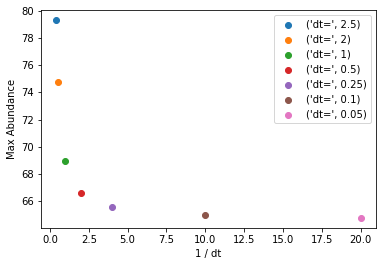

In [501]:
#2.2.3

max_Abundance_B(dcA, dcB, NA_0, t_final, 2.5)
max_Abundance_B(dcA, dcB, NA_0, t_final, 2)
max_Abundance_B(dcA, dcB, NA_0, t_final, dt)
max_Abundance_B(dcA, dcB, NA_0, t_final, .5)
max_Abundance_B(dcA, dcB, NA_0, t_final, .25)
max_Abundance_B(dcA, dcB, NA_0, t_final, .1)
max_Abundance_B(dcA, dcB, NA_0, t_final, .05)